In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

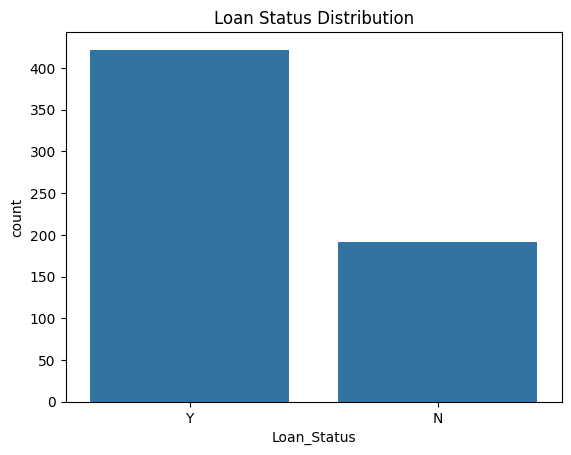

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
print(df['Loan_Status'].value_counts())

sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

In [ ]:
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# Feature Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [ ]:
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])

In [ ]:
label_enc = LabelEncoder()
for col in cat_cols:
    df[col] = label_enc.fit_transform(df[col])


In [ ]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
F1 Score: 0.8404255319148937
ROC-AUC: 0.6565406976744186
Confusion Matrix:
 [[14 29]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.33      0.48        43
           1       0.73      0.99      0.84        80

    accuracy                           0.76       123
   macro avg       0.83      0.66      0.66       123
weighted avg       0.80      0.76      0.72       123



--- Decision Tree ---
F1 Score: 0.7875
ROC-AUC: 0.6960755813953488
Confusion Matrix:
 [[26 17]
 [17 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60        43
           1       0.79      0.79      0.79        80

    accuracy                           0.72       123
   macro avg       0.70      0.70      0.70       123
weighted avg       0.72      0.72      0.72       123



--- Random Forest ---
F1 Score: 0.8524590163934426
ROC-AUC: 0.6968

In [ ]:
import joblib
joblib.dump(models["Random Forest"], "loan_approval_model.pkl")


['loan_approval_model.pkl']